(array([4451, 4473]), array([0, 1, 2]))


Text(0.5, 1.0, 'ADIABATIC, in M50')

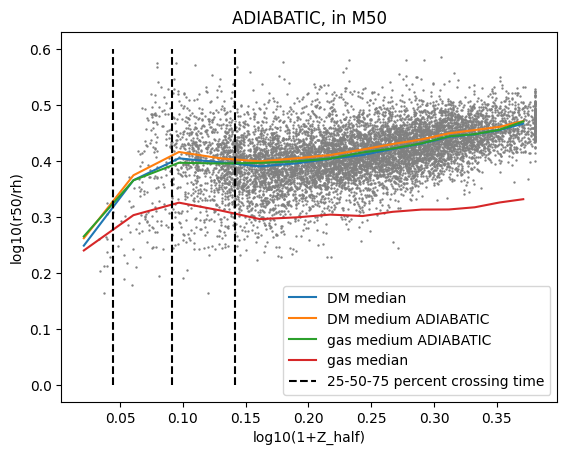

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/halos_ranked.hdf5",'r')
bh_mass=np.array(f['bh_mass'])
id=np.array(f['id'])
bh_mass=bh_mass[id<=0]
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/c_z_half.hdf5",'r')
cdm=np.array(f['cdm_50'])
cg=np.array(f['cg_50'])
zh=np.array(f["z_half_com"])
f.close()
bins=np.arange(0,1.5,0.1)


cdm=cdm[zh!=-1]
cg=cg[zh!=-1]
bh_mass=bh_mass[zh!=-1]
zh=zh[zh!=-1]

bin=0.5*(bins[:-1]+bins[1:])
dig=np.digitize(zh,bins=bins,right=True)



cdm_ave=np.zeros(14)
cg_ave=np.zeros(14)
c_diff=np.zeros(14)
for i in range(0,14):
    cdm_ave[i]=np.median(1/cdm[dig==i+1])
    cg_ave[i]=np.median(1/cg[dig==i+1])
    c_diff[i]=np.median(cg[dig==i+1]/cdm[dig==i+1])

f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800_NoCool/c_z_half.hdf5",'r')
cdm_ad=np.array(f['cdm_50'])
cg_ad=np.array(f['cg_50'])
zh_ad=np.array(f["z_half_com"])



cdm_ad=cdm_ad[zh_ad!=-1]
cg_ad=cg_ad[zh_ad!=-1]
zh_ad=zh_ad[zh_ad!=-1]

dig=np.digitize(zh_ad,bins=bins,right=True)



cdm_ave_ad=np.zeros(14)
cg_ave_ad=np.zeros(14)

for i in range(0,14):
    cdm_ave_ad[i]=np.median(1/cdm_ad[dig==i+1])
    cg_ave_ad[i]=np.median(1/cg_ad[dig==i+1])
f.close()
bh_mass=bh_mass/np.median(bh_mass)
bh_mass[bh_mass>=2]=2
print(np.histogram(bh_mass,bins=[0,1,2]))
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(np.log10(1+zh),np.log10(1/cdm),s=0.5,color="grey")
#cdm_ave=np.bincount(np.array(zh*10,dtype=int),weights=1/cdm)/np.bincount(np.array(zh*10,dtype=int))
#cg_ave=np.bincount(np.array(zh*10,dtype=int),weights=1/cg)/np.bincount(np.array(zh*10,dtype=int))
#ax.plot(np.log10(1+bin),np.log10(c_diff),label="rg/rDM median")
ax.plot(np.log10(1+bin),np.log10(cdm_ave),label="DM median")
ax.plot(np.log10(1+bin),np.log10(cdm_ave_ad),label="DM medium ADIABATIC")
ax.plot(np.log10(1+bin),np.log10(cg_ave_ad),label="gas medium ADIABATIC")
ax.plot(np.log10(1+bin),np.log10(cg_ave),label="gas median")
ax.vlines(np.log10(1.234),0,0.6,linestyles="dashed",colors="k")
ax.vlines(np.log10(1.108),0,0.6,linestyles="dashed",colors="k",label="25-50-75 percent crossing time")
ax.vlines(np.log10(1.385),0,0.6,linestyles="dashed",colors="k")
ax.legend()
ax.set_xlabel("log10(1+Z_half)")
ax.set_ylabel("log10(r50/rh)")
ax.set_title("ADIABATIC, in M50")

ValueError: x and y must have same first dimension, but have shapes (57,) and (14,)

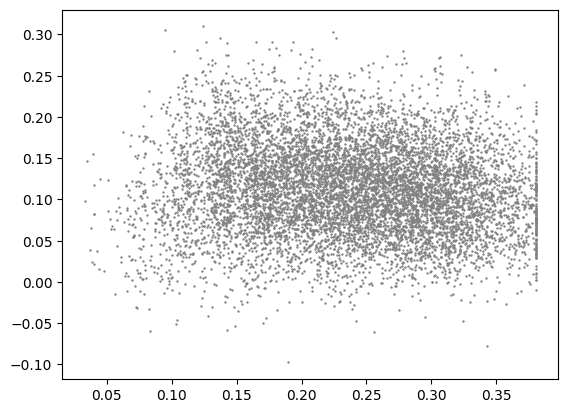

In [23]:
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/S_compare.hdf5",'r')

S_50=np.array(f["S_50"])

f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/c_z_half.hdf5",'r')
cdm=np.array(f['cdm_50'])
cg=np.array(f['cg_50'])
zh=np.array(f["z_half_com"])
f.close()
dig=np.digitize(zh[zh>-1],bins=bins,right=True)



S=np.zeros(14)


for i in range(0,14):
    S[i]=np.median(S_50[zh>-1][dig==i+1])
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
#ax.scatter((cdm/cg)[zh>-1],S_50[zh>-1],s=0.5,color="grey")
ax.scatter(np.log10(1+zh[zh>-1]),S_50[zh>-1],s=0.5,color="grey")
ax.plot(np.log10(1+bin),S,label="median S")

ax.set_ylabel("S(<r50)")
ax.set_xlabel("log10(1+Z_half)")
ax.vlines(np.log10(1.234),0,0.6,linestyles="dashed",colors="k")
ax.vlines(np.log10(1.108),0,0.6,linestyles="dashed",colors="k",label="25-50-75 percent crossing time")
ax.vlines(np.log10(1.385),0,0.6,linestyles="dashed",colors="k")
ax.set_ybound(0,0.3)

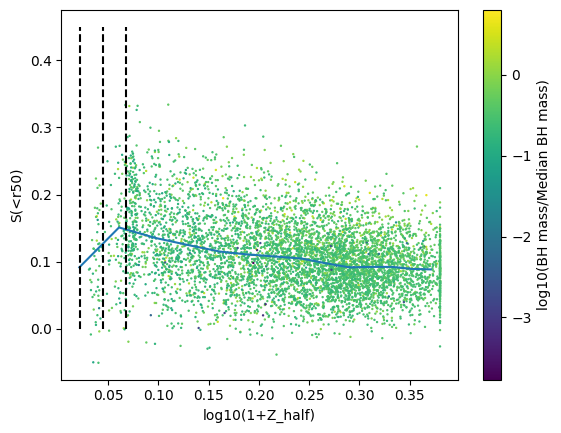

In [28]:
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/S_compare.hdf5",'r')

S_50=np.array(f["S_200"])

f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/c_z_half.hdf5",'r')
cdm=np.array(f['cdm_200'])
cg=np.array(f['cg_200'])
zh=np.array(f["z_half_200_com"])
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/halos_ranked.hdf5",'r')
bh_mass=np.array(f['bh_mass'])
id=np.array(f['id'])
bh_mass=bh_mass[id<=0][zh>-1]
f.close()
dig=np.digitize(zh[zh>-1],bins=bins,right=True)



S=np.zeros(14)


for i in range(0,14):
    S[i]=np.median(S_50[zh>-1][dig==i+1])
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
#ax.scatter((cdm/cg)[zh>-1],S_50[zh>-1],s=0.5,color="grey")
s=ax.scatter(np.log10(1+zh[zh>-1]),S_50[zh>-1],s=0.5,c=np.log10(bh_mass))
plt.colorbar(s,label="log10(BH mass/Median BH mass)")
ax.plot(np.log10(1+bin),S,label="median S")

ax.set_ylabel("S(<r50)")
ax.set_xlabel("log10(1+Z_half)")
ax.vlines(np.log10(1.108),0,0.45,linestyles="dashed",colors="k")
ax.vlines(np.log10(1.0519),0,0.45,linestyles="dashed",colors="k",label="25-50-75 percent crossing time")
ax.vlines(np.log10(1.168),0,0.45,linestyles="dashed",colors="k")
#ax.set_ybound(0,0.3)

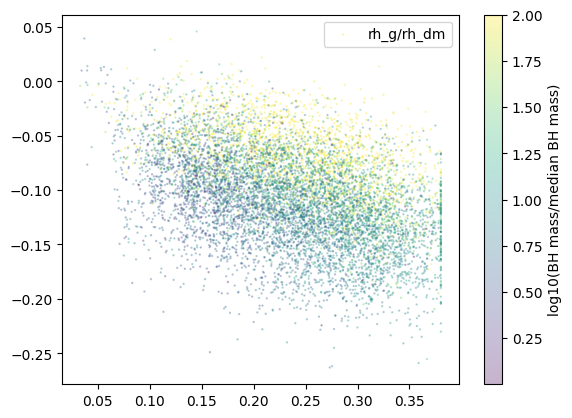

In [39]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
s=ax.scatter(np.log10(1+zh),np.log10((cdm/cg)),s=0.5,alpha=0.3,c=bh_mass,label="rh_g/rh_dm")
plt.colorbar(s,label="log10(BH mass/median BH mass)")
ax.legend()

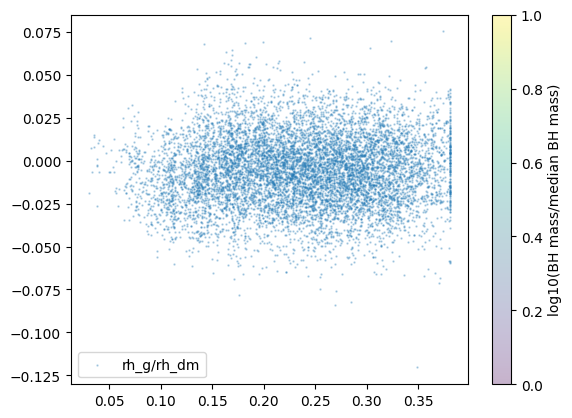

In [62]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
s=ax.scatter(np.log10(1+zh_ad),np.log10((cdm_ad/cg_ad)),s=0.5,alpha=0.3,label="rh_g/rh_dm")
plt.colorbar(s,label="log10(BH mass/median BH mass)")
ax.legend()

Text(0.5, 1.0, 'AD, in M200')

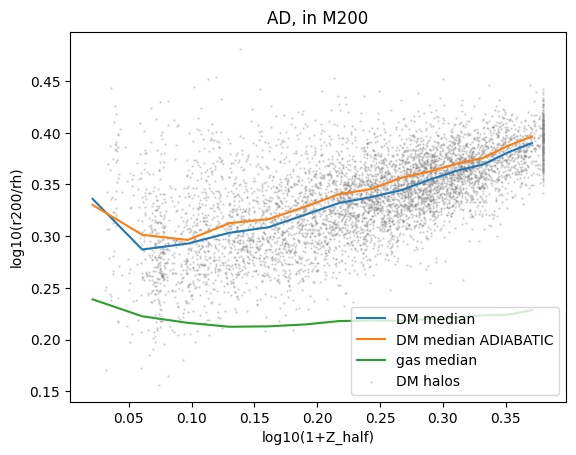

In [6]:
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/halos_ranked.hdf5",'r')
bh_mass=np.array(f['bh_mass'])
id=np.array(f['id'])
bh_mass=bh_mass[id<=0]
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/c_z_half.hdf5",'r')
cdm=np.array(f['cdm_200'])
cg=np.array(f['cg_200'])
zh=np.array(f["z_half_200_com"])

bh_mass=bh_mass[zh!=-1]
bh_mass=bh_mass/np.median(bh_mass)
bh_mass[bh_mass>=2]=2

bins=np.arange(0,1.5,0.1)


cdm=cdm[zh!=-1]
cg=cg[zh!=-1]
zh=zh[zh!=-1]
bin=0.5*(bins[:-1]+bins[1:])
dig=np.digitize(zh,bins=bins,right=True)



cdm_ave=np.zeros(14)
cg_ave=np.zeros(14)
c_diff=np.zeros(14)
for i in range(0,14):
    cdm_ave[i]=np.median(1/cdm[dig==i+1])
    cg_ave[i]=np.median(1/cg[dig==i+1])
    c_diff[i]=np.median(cg[dig==i+1]/cdm[dig==i+1])
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800_NoCool/c_z_half.hdf5",'r')
cdm_ad=np.array(f['cdm_200'])
cg_ad=np.array(f['cg_200'])
zh_ad=np.array(f["z_half_200_com"])



cdm_ad=cdm_ad[zh_ad!=-1]
cg_ad=cg_ad[zh_ad!=-1]
zh_ad=zh_ad[zh_ad!=-1]

dig=np.digitize(zh_ad,bins=bins,right=True)



cdm_ave_ad=np.zeros(14)
cg_ave_ad=np.zeros(14)
for i in range(0,14):
    cdm_ave_ad[i]=np.median(1/cdm_ad[dig==i+1])
    cg_ave_ad[i]=np.median(1/cg_ad[dig==i+1])
f.close()
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
#ax.scatter(np.log10(1+zh),np.log10(1/cg),s=0.5)
#cdm_ave=np.bincount(np.array(zh*10,dtype=int),weights=1/cdm)/np.bincount(np.array(zh*10,dtype=int))
#cg_ave=np.bincount(np.array(zh*10,dtype=int),weights=1/cg)/np.bincount(np.array(zh*10,dtype=int))

ax.plot(np.log10(1+bin),np.log10(cdm_ave),label="DM median")
ax.plot(np.log10(1+bin),np.log10(cdm_ave_ad),label="DM median ADIABATIC")
#ax.plot(np.log10(1+bin),np.log10(c_diff),label="rg/rDM median")
ax.plot(np.log10(1+bin),np.log10(cg_ave),label="gas median")
ax.scatter(np.log10(1+zh),np.log10(1/cdm),s=0.5,alpha=0.3,color="gray",label="DM halos")
ax.legend()
ax.set_xlabel("log10(1+Z_half)")
ax.set_ylabel("log10(r200/rh)")
ax.set_title("AD, in M200")

Text(0, 0.5, 'log10(rg/rDM)')

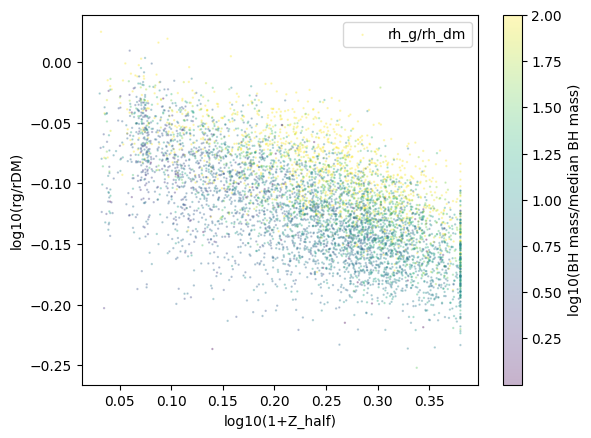

In [46]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
s=ax.scatter(np.log10(1+zh),np.log10((cdm/cg)),s=0.5,alpha=0.3,c=bh_mass,label="rh_g/rh_dm")
plt.colorbar(s,label="log10(BH mass/median BH mass)")
ax.legend()
ax.set_xlabel("log10(1+Z_half)")
ax.set_ylabel("log10(rg/rDM)")

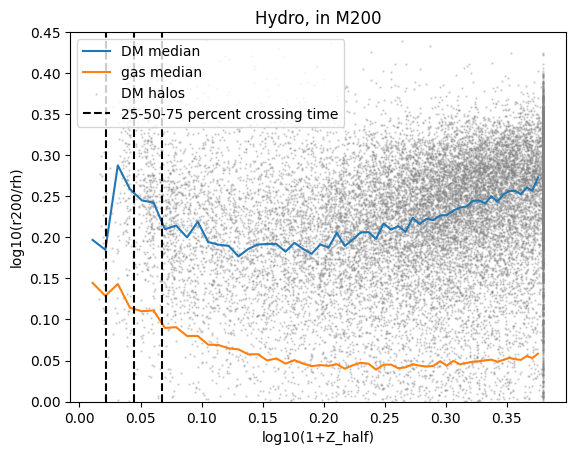

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/c_z_half_13.hdf5",'r')
cdm=np.array(f['cdm_200'])
cg=np.array(f['cg_200'])
zh=np.array(f["z_half_200_com"])

cdm=cdm[zh!=-1]
cg=cg[zh!=-1]
zh=zh[zh!=-1]
bins=np.arange(0,1.45,0.025)
bin=0.5*(bins[:-1]+bins[1:])
dig=np.digitize(zh,bins=bins,right=True)



cdm_ave=np.zeros(58)
cg_ave=np.zeros(58)
for i in range(0,58):
    cdm_ave[i]=np.median(1/cdm[dig==i+1])
    cg_ave[i]=np.median(1/cg[dig==i+1])
f.close()
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
#ax.scatter(np.log10(1+zh),np.log10(1/cg),s=0.5)
#cdm_ave=np.bincount(np.array(zh*20,dtype=int),weights=1/cdm)/np.bincount(np.array(zh*20,dtype=int))
#cg_ave=np.bincount(np.array(zh*20,dtype=int),weights=1/cg)/np.bincount(np.array(zh*20,dtype=int))
ax.plot(np.log10(1+np.arange(0,1.45,0.025)),np.log10(cdm_ave),label="DM median")
ax.plot(np.log10(1+np.arange(0,1.45,0.025)),np.log10(cg_ave),label="gas median")

ax.scatter(np.log10(1+zh),np.log10(1/cdm),s=0.5,alpha=0.3,color="gray",label="DM halos")
ax.vlines(np.log10(1.108),0,0.45,linestyles="dashed",colors="k")
ax.vlines(np.log10(1.0519),0,0.45,linestyles="dashed",colors="k",label="25-50-75 percent crossing time")
ax.vlines(np.log10(1.168),0,0.45,linestyles="dashed",colors="k")
ax.legend()

ax.set_xlabel("log10(1+Z_half)")
ax.set_ylabel("log10(r200/rh)")
ax.set_title("Hydro, in M200")


ax.set_ybound(0,0.45)


[0.19103409 0.15493415 0.20105398 ... 0.18946644 0.18987207 0.13836039]


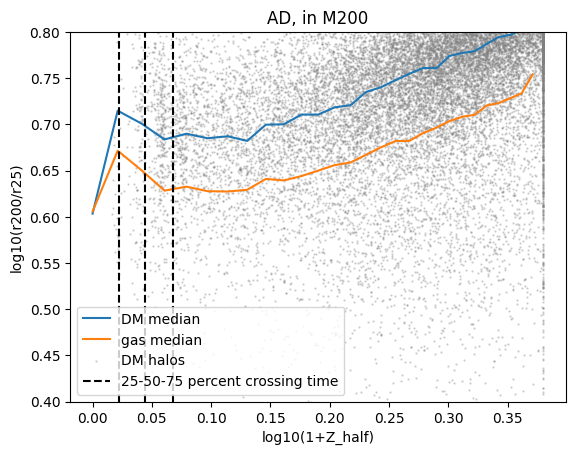

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800_NoCool/c_z_half_13.hdf5",'r')
cdm=np.array(f['cdm_200_25'])
cg=np.array(f['cg_200_25'])
zh=np.array(f["z_half_200_com"])
f.close()
print(cdm)
cdm=cdm[zh!=-1]
cg=cg[zh!=-1]
zh=zh[zh!=-1]
bins=np.arange(0,1.45,0.05)
bin=0.5*(bins[:-1]+bins[1:])
dig=np.digitize(zh,bins=bins,right=True)



cdm_ave=np.zeros(29)
cg_ave=np.zeros(29)
for i in range(0,29):
    cdm_ave[i]=np.median(1/cdm[dig==i+1])
    cg_ave[i]=np.median(1/cg[dig==i+1])

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
#ax.scatter(np.log10(1+zh),np.log10(1/cg),s=0.5)
#cdm_ave=np.bincount(np.array(zh*20,dtype=int),weights=1/cdm)/np.bincount(np.array(zh*20,dtype=int))
#cg_ave=np.bincount(np.array(zh*20,dtype=int),weights=1/cg)/np.bincount(np.array(zh*20,dtype=int))
ax.plot(np.log10(1+np.arange(0,1.45,0.05)),np.log10(cdm_ave),label="DM median")
ax.plot(np.log10(1+np.arange(0,1.45,0.05)),np.log10(cg_ave),label="gas median")

ax.scatter(np.log10(1+zh),np.log10(1/cdm),s=0.5,alpha=0.3,color="gray",label="DM halos")
ax.vlines(np.log10(1.108),0.4,0.8,linestyles="dashed",colors="k")
ax.vlines(np.log10(1.0519),0.4,0.8,linestyles="dashed",colors="k",label="25-50-75 percent crossing time")
ax.vlines(np.log10(1.168),0.4,0.8,linestyles="dashed",colors="k")
ax.legend()

ax.set_xlabel("log10(1+Z_half)")
ax.set_ylabel("log10(r200/r25)")
ax.set_title("AD, in M200")
ax.set_ybound(0.4,0.8)

/opt/anaconda3/envs/myenv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/myenv/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_1847/1779707247.py:27: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(1+zh),np.log10(1/cdm),s=0.5,alpha=0.3,color="gray",label="DM halos")


Text(0.5, 1.0, 'Hydro, in M50')

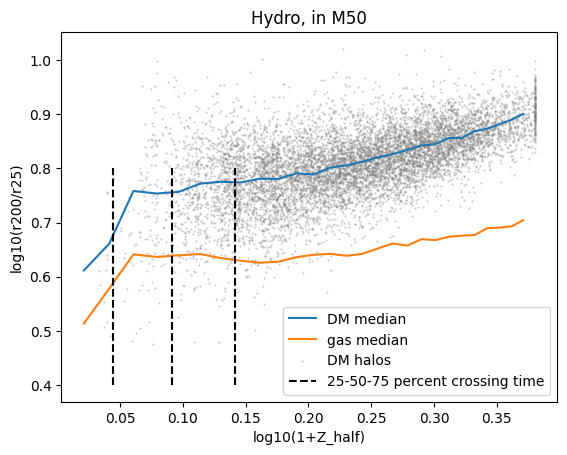

In [10]:
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/c_z_half.hdf5",'r')
cdm=np.array(f['cdm_50_25'])
cg=np.array(f['cb_50_25'])
zh=np.array(f["z_half_com"])
f.close()
#cdm=cdm[zh!=-1]
#cg=cg[zh!=-1]
#zh=zh[zh!=-1]
bins=np.arange(0,1.45,0.05)
bin=0.5*(bins[:-1]+bins[1:])
dig=np.digitize(zh,bins=bins,right=True)



cdm_ave=np.zeros(29)
cg_ave=np.zeros(29)
for i in range(0,29):
    cdm_ave[i]=np.median(1/cdm[dig==i+1])
    cg_ave[i]=np.median(1/cg[dig==i+1])

fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.plot(np.log10(1+np.arange(0,1.45,0.05)),np.log10(cdm_ave),label="DM median")
ax.plot(np.log10(1+np.arange(0,1.45,0.05)),np.log10(cg_ave),label="gas median")

ax.scatter(np.log10(1+zh),np.log10(1/cdm),s=0.5,alpha=0.3,color="gray",label="DM halos")
ax.vlines(np.log10(1.234),0.4,0.8,linestyles="dashed",colors="k")
ax.vlines(np.log10(1.108),0.4,0.8,linestyles="dashed",colors="k",label="25-50-75 percent crossing time")
ax.vlines(np.log10(1.385),0.4,0.8,linestyles="dashed",colors="k")
ax.legend()

ax.set_xlabel("log10(1+Z_half)")
ax.set_ylabel("log10(r200/r25)")
ax.set_title("Hydro, in M50")
#ax.set_ybound(0.4,0.8)

/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_1847/790489387.py:9: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(1+zh),S_50,s=0.5,c=cdm/cg)


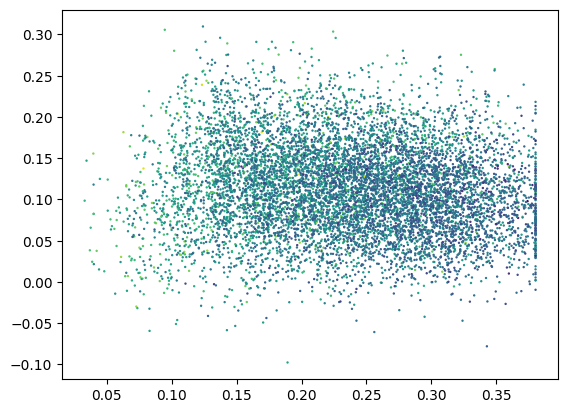

In [14]:
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/S_compare.hdf5",'r')

S_50=np.array(f["S_50"])

f.close()
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.scatter(np.log10(1+zh),S_50,s=0.5,c=cdm/cg)

